In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Data Exploration

In this notebook, we will explore the data after the first data cleaning but before any data preprocessing has been done.

The objective of this part, is to gain insight for the client in the business part considering the columns that will not be used for the model as well as for the model training or a possible extension of the model in the future.

We have analyzed the complete dataset here, since we have trained the model without those columns. We wanted to give insights about this columns to plan future approaches of the problem.

In [3]:
cleaned_data = pd.read_csv('data/processed/cleaned_data.csv')

In [4]:
cleaned_data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,393606.000000,393606.000000,393606.000000,393606.000000
mean,282537.185536,1.732883,2.203262,4.179187
std,165111.507291,6.869854,7.533126,1.312038
min,1.000000,0.000000,0.000000,1.000000
25%,138651.250000,0.000000,0.000000,4.000000
50%,279657.500000,0.000000,1.000000,5.000000
75%,428215.750000,2.000000,2.000000,5.000000
max,568454.000000,866.000000,923.000000,5.000000


## Score

Mean Score : 4.18

In [5]:
cleaned_data.Score.value_counts()

5    250726
4     56043
1     36282
3     29759
2     20796
Name: Score, dtype: int64

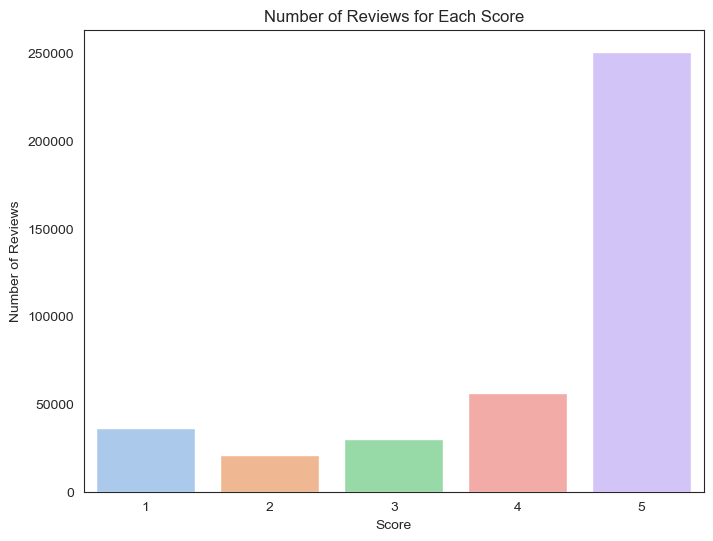

In [6]:
score_counts = cleaned_data['Score'].value_counts().sort_index()

sns.set_style("white")

# Define a color palette for the bars
colors = sns.color_palette('pastel', len(score_counts))

# Plot the number of reviews for each score
plt.figure(figsize=(8, 6))
sns.barplot(x=score_counts.index, y=score_counts.values, palette=colors)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Score')

# Show the plot
plt.show()

We notice that the dataset in imbalanced, the number of 5 stars reviews is much higher than the rest

## Helpfulness

The helpfulness is a feature that seems to be not correctly promoted in the platform. The results has been proved that there is a correlation in good reviews and the helpfulness metric. If promoted correctly, it could be used as an extra mismatched flag for the reviews. 

We have discovered that it also correlated to better review scores, that could be a trend that can be analyzed later. If people tend to feel more thankful to positive reviews than negative.

In [9]:
(cleaned_data['HelpfulnessDenominator'] == 0).sum() / cleaned_data.shape[0]

0.46879366676320994

Analyze the helpfulness, here we compute the ratio of numerator/denominator and get rid ov NaN values which are given by the cases in which the denominator is zero (whene the reviews haven't been voted)

In [ ]:
cleaned_data_h = cleaned_data.copy()

In [8]:
cleaned_data_h['HelpfulnessRatio'] = cleaned_data_h['HelpfulnessNumerator'] / cleaned_data_h['HelpfulnessDenominator']
cleaned_data_h.dropna(subset=['HelpfulnessRatio'], inplace=True)


### Now we classify the helfulness into three classes: Very Helpful, Mid Helpful and Not Helpful

In [22]:
def categorize_helpfulness(ratio):
    if ratio >= 0.75:
        return 'Very Helpful'
    elif 0.25 <= ratio < 0.75:
        return 'Mid Helpful'
    else:
        return 'Not Helpful'

cleaned_data_h['HelpfulnessCategory'] = cleaned_data_h['HelpfulnessRatio'].apply(categorize_helpfulness)


In [26]:
cleaned_data_h.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,HelpfulnessRatio
count,209086.000000,209086.000000,209086.000000,209086.000000,209086.000000
mean,282353.732072,3.262165,4.147657,4.001985,0.786290
std,164394.179752,9.157301,9.938009,1.448322,0.341312
min,1.000000,0.000000,1.000000,1.000000,0.000000
25%,138781.250000,1.000000,1.000000,3.000000,0.666667
50%,279957.500000,2.000000,2.000000,5.000000,1.000000
75%,427528.500000,3.000000,4.000000,5.000000,1.000000
max,568453.000000,866.000000,923.000000,5.000000,3.000000


Mean Helpfulness : 78.6%

### We visualize how the helpfulness of the reviews is distributed, most reviews are considered to be very helpful

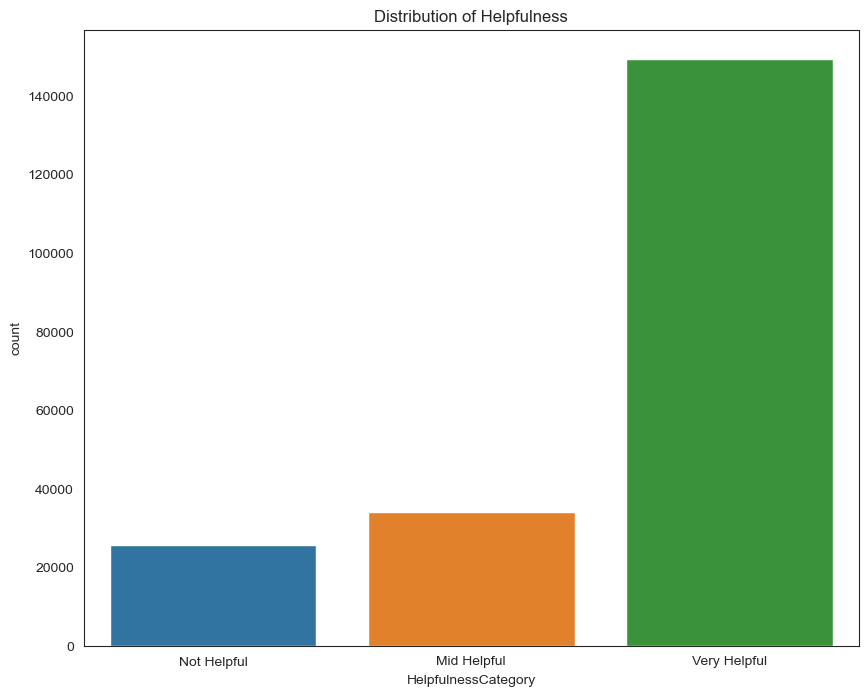

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x='HelpfulnessCategory',data=cleaned_data_h,order=['Not Helpful','Mid Helpful','Very Helpful'])
plt.title('Distribution of Helpfulness')
plt.show()

## Users

### Pattern/trend related to most prolific reviewers
we plot the helpfulness ratio and mean score and notice that top reviewers levae on average very good and helfpul reviews -> we should incentivize people to review and say if the review has been helpful more

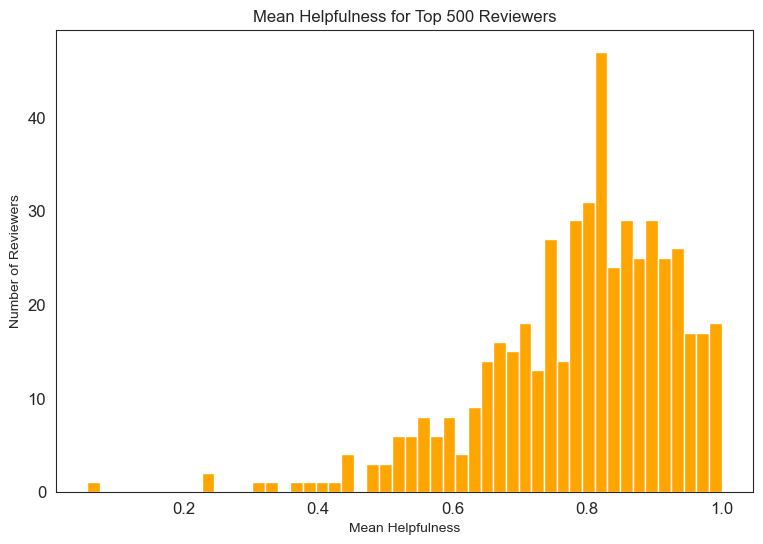

In [14]:

top_500_reviewers = cleaned_data_h['UserId'].value_counts().head(500).index.tolist()
top_500_reviews = cleaned_data_h[cleaned_data_h['UserId'].isin(top_500_reviewers)]
mean_helpfulness_per_reviewer = top_500_reviews.groupby('UserId')['HelpfulnessRatio'].mean()

# Plotting
plt.figure(figsize=(9, 6))
plt.hist(mean_helpfulness_per_reviewer, bins=50, color='orange')
plt.xlabel('Mean Helpfulness')
plt.ylabel('Number of Reviewers')
plt.title('Mean Helpfulness for Top 500 Reviewers')

plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)  # Set font size for y-axis tick labels
plt.grid(False)
plt.savefig('mean_helpfulness_histogram.png')

plt.show()

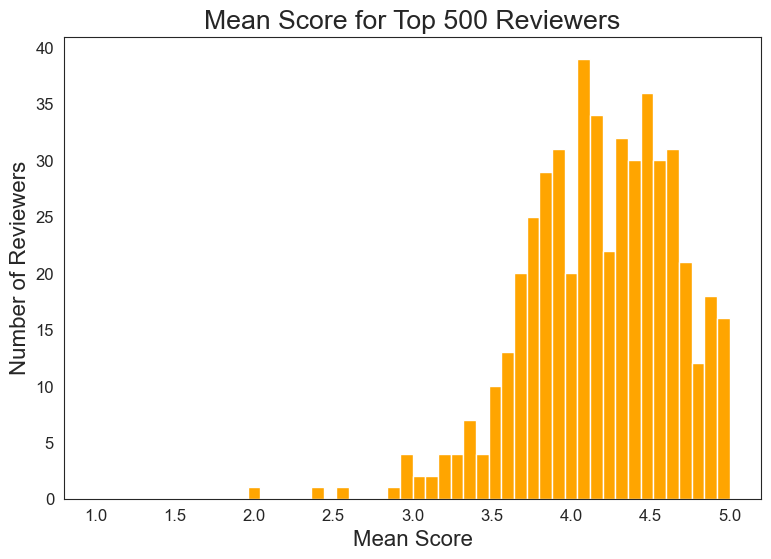

Number of reviewers with average score >= 4: 334


In [15]:
reviewer_review_counts = cleaned_data['UserId'].value_counts()
top_reviewers = reviewer_review_counts.head(500).index

# Filter the data for the top 500 reviewers
top_reviewer_data = cleaned_data[cleaned_data['UserId'].isin(top_reviewers)]

# Calculate the mean score for each of the top 500 reviewers
mean_score_per_reviewer = top_reviewer_data.groupby('UserId')['Score'].mean()
plt.rcParams.update({'font.size': 16})
# Plot a histogram of the mean scores
plt.figure(figsize=(9, 6))
plt.hist(mean_score_per_reviewer, bins=50, range=(1, 5), color='orange')  # Set x-axis range from 1 to 5
plt.xlabel('Mean Score')
plt.ylabel('Number of Reviewers')
plt.title('Mean Score for Top 500 Reviewers')
plt.grid(False)
plt.xticks(fontsize=12)  # Set font size for x-axis tick labels
plt.yticks(fontsize=12)
plt.savefig('mean_score_histogram.png')
plt.show()

# Count the number of reviewers with mean score >= 4
num_reviewers_high_score = (mean_score_per_reviewer >=4).sum()

print(f"Number of reviewers with average score >= 4: {num_reviewers_high_score}")

## Reviews

### Relationship between number of reviews and average score over all the dataset

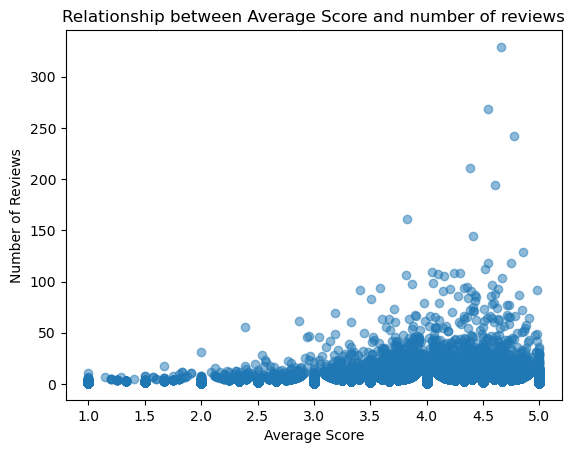

In [ ]:
#count  number of reviews given by each user
user_review_counts = cleaned_data['UserId'].value_counts()

# Calculate average scores given by each user
user_average_scores = cleaned_data.groupby('UserId')['Score'].mean()

user_stats = pd.DataFrame({'ReviewCount': user_review_counts, 'AverageScore': user_average_scores})

# Plotting
plt.scatter(user_stats['AverageScore'], user_stats['ReviewCount'], alpha=0.5)
plt.xlabel('Average Score')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Average Score and number of reviews')
plt.show()

Users with more reviews to higher ratings

### Visualize how the number of reviews grows over the years

The trend says that the number of 5 score reviews and positive reviews in general are growing exponentially respect to the others.

In [36]:
cleaned_data['Time'] = pd.to_datetime(cleaned_data['Time'])

# Extract 'Month' and 'Year' from the 'Time' column
cleaned_data['Month'] = cleaned_data['Time'].dt.month
cleaned_data['Year'] = cleaned_data['Time'].dt.year

In [37]:
cleaned_data.Year.value_counts()

2012.0    138910
2011.0    113399
2010.0     57938
2009.0     37940
2008.0     23226
2007.0     15774
2006.0      4748
2005.0      1072
2004.0       427
2003.0       107
2002.0        37
2000.0        15
2001.0         8
1999.0         4
Name: Year, dtype: int64

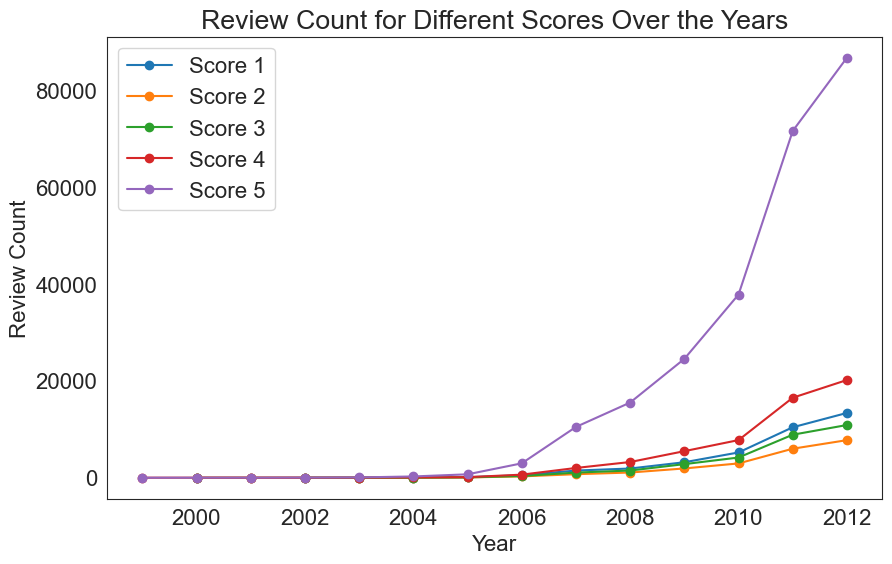

In [40]:
review_count_per_year_score = cleaned_data.groupby(['Year', 'Score'])['Text'].count().unstack()

# Plotting review count for different scores over the years
plt.figure(figsize=(10, 6))
for score in range(1, 6):
    plt.plot(review_count_per_year_score.index, review_count_per_year_score[score], marker='o', label=f'Score {score}')

plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Count for Different Scores Over the Years')
plt.legend()

plt.show()

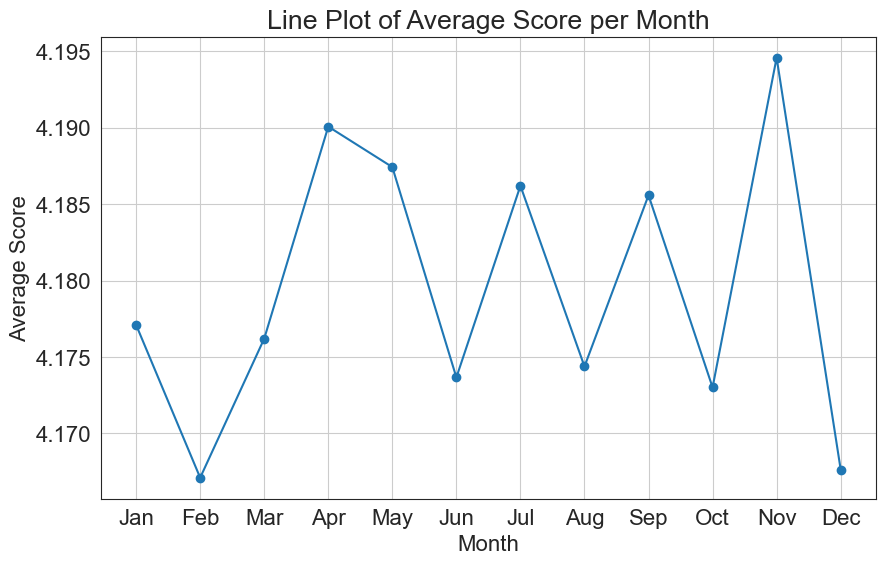

In [41]:
average_score_per_month = cleaned_data.groupby('Month')['Score'].mean()

# Plotting average score per month as a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_score_per_month.index, average_score_per_month.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.title('Line Plot of Average Score per Month')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
  # Set y-axis range from 0 to 5 for average score
plt.show()

there is not much variability in the average score over the months

### The length of the reviews with 3 stars is the longest, while 5 stars are the shortes
Reviewers of 3 stars might feel the need to express on both positive and negative aspects of the product, leading to longer reviews; probably very satisfies customers do not write much but very concise reviews.

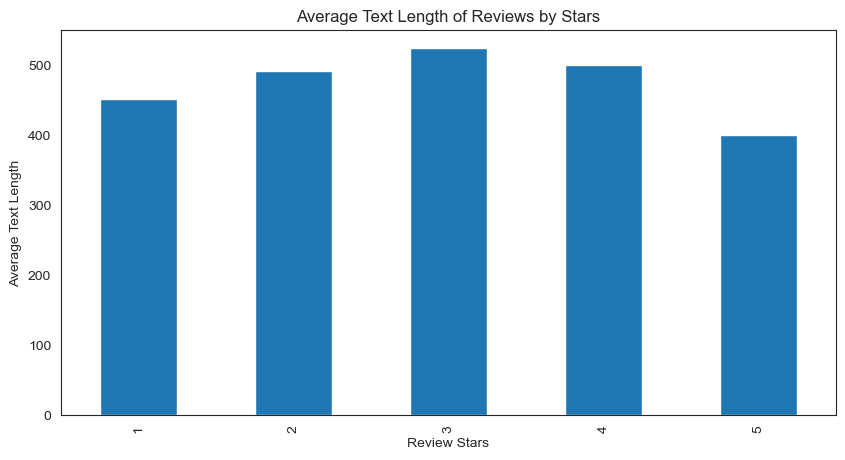

In [7]:
cleaned_data['Text_Length'] = cleaned_data['Text'].apply(len)

# Group by score and calculate the average text length for each score
score_text_length = cleaned_data.groupby('Score')['Text_Length'].mean()

ax = score_text_length.plot(kind='bar',
                            title='Average Text Length of Reviews by Stars',
                            figsize=(10, 5))
ax.set_xlabel('Review Stars')
ax.set_ylabel('Average Text Length')
plt.show()

# Conclusions

- Helpfulness is a good starting point to ensure the quality of the reviews and we strongly recommend to be promoted.
- There is a pattern to the percentage of positive reviews increasing by time. If the patterns continue, probably it will be very important to avoid bad reviews at the first stage of the product.
- More reviews, usually has better score. Promoting people to review more in other products can increase the overall score of the brand.
- From the model point of view, the imbalance labels can be a problem.